## Correlaciones

In [250]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix

In [251]:
contaminante = "PM2.5"

In [340]:
data = pd.read_csv("./correlacion/datos_gb_correlacion.csv")
data.head()

,fecha,hora,dia,mes,O3_x,PM10mean_x,PM25mean_x,O3_y,PM10mean_y,PM25mean_y,...,NOX,O3,PM10,PM2.5,RH,SO2,TMP,WSP,PM10mean,PM25mean
0,2016-01-02 23:00:00,23,2.0,1.0,4.0,36.750000,24.833333,21.0,53.166667,32.250000,...,44.666667,10.166667,50.000000,25.000000,54.6,13.000000,17.58,1.80,46.798611,27.909722
1,2016-01-03 00:00:00,0,3.0,1.0,1.0,36.208333,24.541667,10.0,52.166667,32.416667,...,48.166667,4.833333,35.833333,17.666667,64.6,13.166667,14.20,2.26,46.173611,27.645833
2,2016-01-03 01:00:00,1,3.0,1.0,1.0,35.958333,24.000000,3.0,53.833333,32.458333,...,63.333333,1.666667,56.666667,29.000000,62.0,15.500000,16.08,1.30,46.555556,27.423611
3,2016-01-03 02:00:00,2,3.0,1.0,1.0,35.708333,23.541667,5.0,55.250000,32.666667,...,49.166667,2.333333,48.000000,25.333333,64.4,18.500000,15.38,1.32,46.722222,27.159722
4,2016-01-03 03:00:00,3,3.0,1.0,1.0,35.333333,23.000000,4.0,56.583333,33.291667,...,45.333333,2.166667,49.500000,29.666667,66.0,28.666667,15.10,1.28,47.097222,27.173611


## 2.3 Correlación cruzada entre contaminantes

Es necesario conocer la correlación entre los contaminantes a distintos rangos de tiempo. Por ejemplo, es de interés saber si las partículas PM10 aumentan o disminuyen 24 hrs después de que subió el O3 o algún otro contaminante. Para ello se construye una función que calcule la correlación desfasada cada hora.

Esta función fue obtenida en un artículo de kaggle titulado [Cross-correlation (time-lag) with pandas](https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas) y aplicada en este trabajo: 

In [4]:
def data_lag(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [5]:
NON_DER = ['fecha']

In [6]:
data_72 = data_lag(data, 48, NON_DER)

Se corre la correlación para este desfase y se guarda en un nuevo dataframe.



In [7]:
data_72_corr = data_72.corr()

La tabla obtenida tiene todos los valores desfasados hasta 72 horas. Por ejemplo la columna indicada como PM10_63 muestra la correlación de todos los contaminantes con diferencia de 63 horas.

In [ ]:
data_72_corr.head()

Guardamos el archivo para no tener que correlo de nuevo:

### Leemos el csv:

In [410]:
contaminante = 'PM25mean_y'

In [411]:
data_72_corr = pd.read_csv("./correlacion/correlaciones.csv", sep=',', encoding='utf-8')


In [412]:
#pm25
data_72_corr = data_72_corr[~data_72_corr['Unnamed: 0'].isin
                            (['O3_x', 'O3_y',"PM10mean_y","PM10mean_x","PM25mean_x"])]
data_72_corr.drop(['O3_x', 'O3_y',"PM10mean_y","PM10mean_x","PM25mean_x"], axis=1, inplace=True)

In [413]:
data_72_corr.set_index('Unnamed: 0', inplace=True)

data_72_corr = data_72_corr.iloc[:,1:]

In [414]:
data_72_corr.head(5)

,dia,mes,PM25mean_y,CO,NO,NO2,NOX,O3,PM10,PM2.5,...,PM25mean_39,PM25mean_40,PM25mean_41,PM25mean_42,PM25mean_43,PM25mean_44,PM25mean_45,PM25mean_46,PM25mean_47,PM25mean_48
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
hora,-0.000269,0.000184,0.000241,-0.092131,-0.260889,-0.032663,-0.219169,0.370638,0.089325,-0.005644,...,-0.013763,-0.013486,-0.012326,-0.010823,-0.008703,-0.006442,-0.004454,-0.002332,-0.000220,0.001987
dia,1.000000,0.009086,-0.022622,0.006399,0.004089,0.016452,0.008647,-0.005432,-0.014460,-0.023652,...,-0.002446,-0.002040,-0.001565,-0.001054,-0.000510,0.000038,0.000573,0.001162,0.001746,0.002297
mes,0.009086,1.000000,-0.231276,-0.084347,-0.014354,-0.102672,-0.045378,-0.126094,-0.210553,-0.144316,...,-0.201636,-0.201760,-0.201901,-0.202051,-0.202221,-0.202395,-0.202574,-0.202765,-0.202964,-0.203178
PM25mean_y,-0.022622,-0.231276,1.000000,0.374677,0.179573,0.474621,0.299655,0.147939,0.636803,0.632124,...,0.469315,0.462476,0.455952,0.449723,0.443783,0.438209,0.432967,0.427984,0.423297,0.418915
CO,0.006399,-0.084347,0.374677,1.000000,0.803610,0.745388,0.887388,-0.258664,0.554828,0.507122,...,0.152320,0.152044,0.151621,0.151052,0.150236,0.148970,0.147075,0.144685,0.141863,0.139085


### 2.3.1 Correlación entre PM10 y los demás contaminantes

Siendo las partmículas PM10 uno de los determinantes para detonar una contingencia ambiental, interesa saber de que manera se correlacionan con los demás contaminantes y en que ciclos de tiempo dicha correlación es más fuerte.

Se graficará esta correlación para el rango de 0 a 72 horas obtenido en la sección anterior.

Antes de correr la correlación se le vuelve a dar estructura al dataframe para poder graficar de manera óptima.

In [415]:
# Se aísla sólo la columna que corresponde a las partículas PM10
PM10_72 = data_72_corr[[contaminante]]


# Se reinicia el índice del dataframe
PM10_72.reset_index(inplace=True)

# Se renombran las columnas para mayor comprensión
PM10_72.columns = ['contaminante', 'valor']


El dataframe tendrá la siguiente estructura:

In [416]:
PM10_72['horas'] = PM10_72['contaminante'].str.split('_').str[-1]
PM10_72['contaminante'] = PM10_72['contaminante'].str.split('_').str[0]
PM10_72.fillna(0,inplace=True)

In [417]:
PM10_72.head(20)

,contaminante,valor,horas
0,hora,0.000241,hora
1,dia,-0.022622,dia
2,mes,-0.231276,mes
3,PM25mean,1.000000,y
4,CO,0.374677,CO
5,NO,0.179573,NO
6,NO2,0.474621,NO2
7,NOX,0.299655,NOX
8,O3,0.147939,O3
9,PM10,0.636803,PM10


In [418]:
PM10_72.horas = PM10_72.horas.apply(pd.to_numeric, errors='coerce').fillna(0)

In [419]:
PM10_72.to_csv("./correlacion/correlaciones_"+contaminante+".csv", sep=',', encoding='utf-8')

## Gráficas

In [420]:
pv = pd.pivot_table(PM10_72, values='valor', index=['horas'],columns=['contaminante'])

In [421]:
pv = pd.pivot_table(PM10_72, values='valor', index=['horas'],columns=['contaminante'])

pv = pv.reset_index(drop=False)

pv.horas = pv.horas.astype(int)
pv = pv.sort_values(by='horas', ascending=True)

pv.head()

contaminante,horas,CO,NO,NO2,NOX,O3,PM10,PM10mean,PM2.5,PM25mean,RH,SO2,TMP,WSP,dia,hora,mes
0,0,0.374677,0.179573,0.474621,0.299655,0.147939,0.636803,0.891033,0.632124,0.967120,-0.275245,0.253312,-0.020994,-0.185273,-0.022622,0.000241,-0.231276
1,1,0.387160,0.188665,0.487885,0.311280,0.165401,0.650364,0.782436,0.650046,0.855982,-0.271942,0.260732,-0.025862,-0.195470,-0.022931,-0.001913,-0.231105
2,2,0.397168,0.196651,0.498454,0.321136,0.162571,0.660558,0.778412,0.663877,0.850763,-0.268476,0.267641,-0.030949,-0.204995,-0.023105,-0.003976,-0.230824
3,3,0.404531,0.202497,0.506266,0.328378,0.159571,0.667699,0.773121,0.674403,0.843858,-0.265296,0.273599,-0.035741,-0.213387,-0.023064,-0.005870,-0.230427
4,4,0.408998,0.205425,0.511965,0.332603,0.156958,0.672715,0.766821,0.682278,0.835509,-0.262726,0.279208,-0.039819,-0.219735,-0.022871,-0.007273,-0.229931


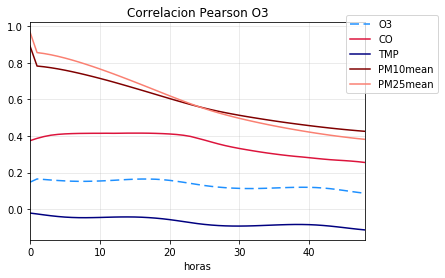

In [422]:

fig = plt.figure()
ax = fig.gca()

pv.plot(x="horas", y=["O3"],ax=ax,color='dodgerblue',dashes=[6, 3],linewidth=1.50)
pv.plot(x="horas", y=["CO"],ax=ax,color="crimson")
pv.plot(x="horas", y=["TMP"],ax=ax,color='navy')
pv.plot(x="horas", y=["PM10mean"],ax=ax,color='maroon')
pv.plot(x="horas", y=["PM25mean"],ax=ax,color='salmon')


plt.title("Correlacion Pearson O3")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)
plt.legend()
ax.legend(bbox_to_anchor=(0.93, .65))

plt.savefig('./correlacion/'+contaminante+'correlacion.png', bbox_inches='tight'
            , dpi=400)
plt.show()